Cross-validation Results:
Accuracy: 0.99
Precision: 0.979539641943734
Recall: 1.0
F1 Score: 0.9894949494949495


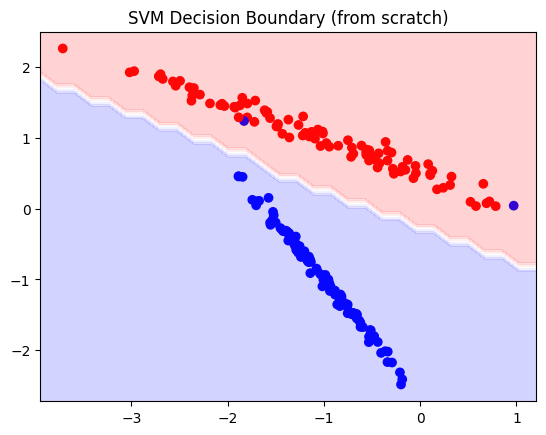

In [3]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

class SVM:
    def __init__(self, lr=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = lr
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    # correctly classified -> only regularization
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    # misclassified or within margin
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
      linear_output = np.dot(X, self.w) - self.b
      return np.where(linear_output >= 0, 1, 0)


# Generating toy dataset consiting of 2 classes
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=1)

# Cross-validating
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accs, precs, recs, f1s = [], [], [], []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    clf = SVM(lr=0.001, lambda_param=0.01, n_iters=1000)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)


    accs.append(accuracy_score(y_test, preds))
    precs.append(precision_score(y_test, preds, average='binary', pos_label=1))
    recs.append(recall_score(y_test, preds, average='binary', pos_label=1))
    f1s.append(f1_score(y_test, preds, average='binary', pos_label=1))


print("Cross-validation Results:")
print("Accuracy:", np.mean(accs))
print("Precision:", np.mean(precs))
print("Recall:", np.mean(recs))
print("F1 Score:", np.mean(f1s))


clf = SVM(lr=0.001, lambda_param=0.01, n_iters=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30),
                     np.linspace(ylim[0], ylim[1], 30))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='bwr')
plt.title("SVM Decision Boundary (from scratch)")
plt.show()
